In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import segysak
from segysak import open_seisnc, segy

from src.definitions import ROOT_DIR
from src.data.utils import head, line_count


/home/pinto/miniconda3/envs/gsh_py_gp/lib/python3.10/site-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%matplotlib ipympl

# Explore SEGY

In [4]:
# Downloaded files directory
dst_dir = ROOT_DIR / "data"

segy_path = dst_dir / "external/groningen/Seismic_Volume/R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.SEGY"

In [5]:
segysak.segy.get_segy_texthead(segy_path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2019.4 Saturday, December 12 2020 19:04:14
C 2 Name: R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG ÝRealized¨ 1 Type: 3D seismic
C 3
C 4 First inline: 7740   Last inline: 9700
C 5 First xline:  7570   Last xline:  9750
C 6 CRS: Amersfoort / RD New Ý1672_28992¨ (NL Onshore) ÝPetrel,700049¨
C 7 X min: 223500.00 max: 272525.00 delta: 49025.00
C 8 Y min: 564250.00 max: 618775.00 delta: 54525.00
C 9 Depth min: -6004.00 max: 4.00 delta: 6008.00
C10 Lat min: 53.03'12.1212"N max: 53.33'6.3281"N delta: 0.29'54.2068"
C11 Long min: 6.24'34.4791"E max: 7.09'38.6504"E delta: 0.45'4.1713"
C12 Trace min: -6000.00 max: 0.00 delta: 6000.00
C13 Seismic (template) min: -13868.20 max: 12522.78 delta: 26390.98
C14 Amplitude (data) min: -13868.20 max: 12522.78 delta: 26390.98
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [6]:
scan = segysak.segy.segy_header_scan(segy_path)

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

In [7]:
with pd.option_context("display.max_rows", 89):
    display(scan)

byte_loc   count        mean  \
TRACE_SEQUENCE_LINE                            1  1000.0       500.5   
TRACE_SEQUENCE_FILE                            5  1000.0      7740.0   
FieldRecord                                    9  1000.0      7740.0   
TraceNumber                                   13  1000.0       500.5   
EnergySourcePoint                             17  1000.0         0.0   
CDP                                           21  1000.0      8069.5   
CDP_TRACE                                     25  1000.0         1.0   
TraceIdentificationCode                       29  1000.0         1.0   
NSummedTraces                                 31  1000.0         0.0   
NStackedTraces                                33  1000.0         0.0   
DataUse                                       35  1000.0         1.0   
offset                                        37  1000.0         0.0   
ReceiverGroupElevation                        41  1000.0         0.0   
SourceSurfaceElevation                        45  1000.0         0.0   
SourceDepth                                   49  1000.0         0.0   
ReceiverDatumElevation                        53  1000.0         0.0   
SourceDatumElevation                          57  1000.0         0.0   
SourceWaterDepth                              61  1000.0         0.0   
GroupWaterDepth                               65  1000.0         0.0   
ElevationScalar                               69  1000.0         1.0   
SourceGroupScalar                             71  1000.0      -100.0   
SourceX                                       73  1000.0  22351250.0   
SourceY                                       77  1000.0  57675000.0   
GroupX                                        81  1000.0         0.0   
GroupY                                        85  1000.0         0.0   
CoordinateUnits                               89  1000.0         1.0   
WeatheringVelocity                            91  1000.0         0.0   
SubWeatheringVelocity                         93  1000.0         0.0   
SourceUpholeTime                              95  1000.0         0.0   
GroupUpholeTime                               97  1000.0         0.0   
SourceStaticCorrection                        99  1000.0         0.0   
GroupStaticCorrection                        101  1000.0         0.0   
TotalStaticApplied                           103  1000.0         0.0   
LagTimeA                                     105  1000.0         0.0   
LagTimeB                                     107  1000.0         0.0   
DelayRecordingTime                           109  1000.0         0.0   
MuteTimeStart                                111  1000.0         0.0   
MuteTimeEND                                  113  1000.0         0.0   
TRACE_SAMPLE_COUNT                           115  1000.0       751.0   
TRACE_SAMPLE_INTERVAL                        117  1000.0      8000.0   
GainType                                     119  1000.0         0.0   
InstrumentGainConstant                       121  1000.0         0.0   
InstrumentInitialGain                        123  1000.0         0.0   
Correlated                                   125  1000.0         1.0   
SweepFrequencyStart                          127  1000.0         0.0   
SweepFrequencyEnd                            129  1000.0         0.0   
SweepLength                                  131  1000.0         0.0   
SweepType                                    133  1000.0         1.0   
SweepTraceTaperLengthStart                   135  1000.0         0.0   
SweepTraceTaperLengthEnd                     137  1000.0         0.0   
TaperType                                    139  1000.0         1.0   
AliasFilterFrequency                         141  1000.0         0.0   
AliasFilterSlope                             143  1000.0         0.0   
NotchFilterFrequency                         145  1000.0         0.0   
NotchFilterSlope                             147  1000.0         0.0   
LowCutFr

In [8]:
scrape = segysak.segy.segy_header_scrape(segy_path, partial_scan=10000)

  0%|          | 0.00/10.0k [00:00<?, ? traces/s]

In [9]:
cols = [
    "TRACE_SEQUENCE_FILE",
    "CDP",
    "SourceX",
    "SourceY",
]
scrape.loc[:, cols]

TRACE_SEQUENCE_FILE   CDP   SourceX   SourceY
0                    7740  7570  22351250  56426250
1                    7740  7571  22351250  56428750
2                    7740  7572  22351250  56431250
3                    7740  7573  22351250  56433750
4                    7740  7574  22351250  56436250
...                   ...   ...       ...       ...
9995                 7744  8841  22361250  59603750
9996                 7744  8842  22361250  59606250
9997                 7744  8843  22361250  59608750
9998                 7744  8844  22361250  59611250
9999                 7744  8845  22361250  59613750

[10000 rows x 4 columns]

# Covert downloaded SEGY to SEISNC

In [10]:
seisnc_path = dst_dir / "interim/R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.seisnc"

In [11]:
# This will take between 2-3 hours
if not seisnc_path.exists():
    segy.segy_converter(
        segy_path,
        seisnc_path,
        iline=5,
        xline=21,
        cdpx=73,
        cdpy=77,
        vert_domain="DEPTH"
    )

In [12]:
seisnc = open_seisnc(seisnc_path, chunks={"inline": 100})

In [13]:
seisnc.seis.humanbytes

'12 GB'

In [14]:
seisnc

<xarray.Dataset>
Dimensions:  (iline: 1961, xline: 2181, depth: 751)
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
  * depth    (depth) float64 0.0 8.0 16.0 24.0 ... 5.984e+03 5.992e+03 6e+03
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
Data variables:
    data     (iline, xline, depth) float32 dask.array<chunksize=(1961, 2181, 751), meta=np.ndarray>
Attributes: (12/13)
    sample_rate:         8.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Saturday, Decembe...
    measurement_system:  m
    source_file:         R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.SEGY
    percentiles:         [0. 0. 0. 0. 0. 0. 0.]
    coord_scalar:        -100.0
    ...                  ...
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    srd:                 None
    datatype:            None

# View horizons and inline

In [15]:
horizon_paths = {
    "NS_B": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_NS_B_tr_depth",
    "CK_B": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_CK_B_pk_depth",
    "RNRO1_T": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_RNRO1_T_pk_depth",
    "ZE_T": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_ZE_T_na_depth",
    "RO_T": "external/groningen/Horizon_Interpretation/RO____T",
}

In [16]:
col_names = ["inline", "xline", "easting", "northing", "depth"]

horizons = {}
for horizon_name, horizon_path in horizon_paths.items():
    horizon_full_path = dst_dir / horizon_path
    horizons[horizon_name] = pd.read_csv(horizon_full_path, sep=r"\s+", header=None, names=col_names)

In [17]:
inl_sel = 9000

In [18]:
horizon_trace = {}
for horizon_name, horizon in horizons.items():
    is_inline = horizon["inline"] == inl_sel
    horizon_trace[horizon_name] = horizon.loc[is_inline, :]

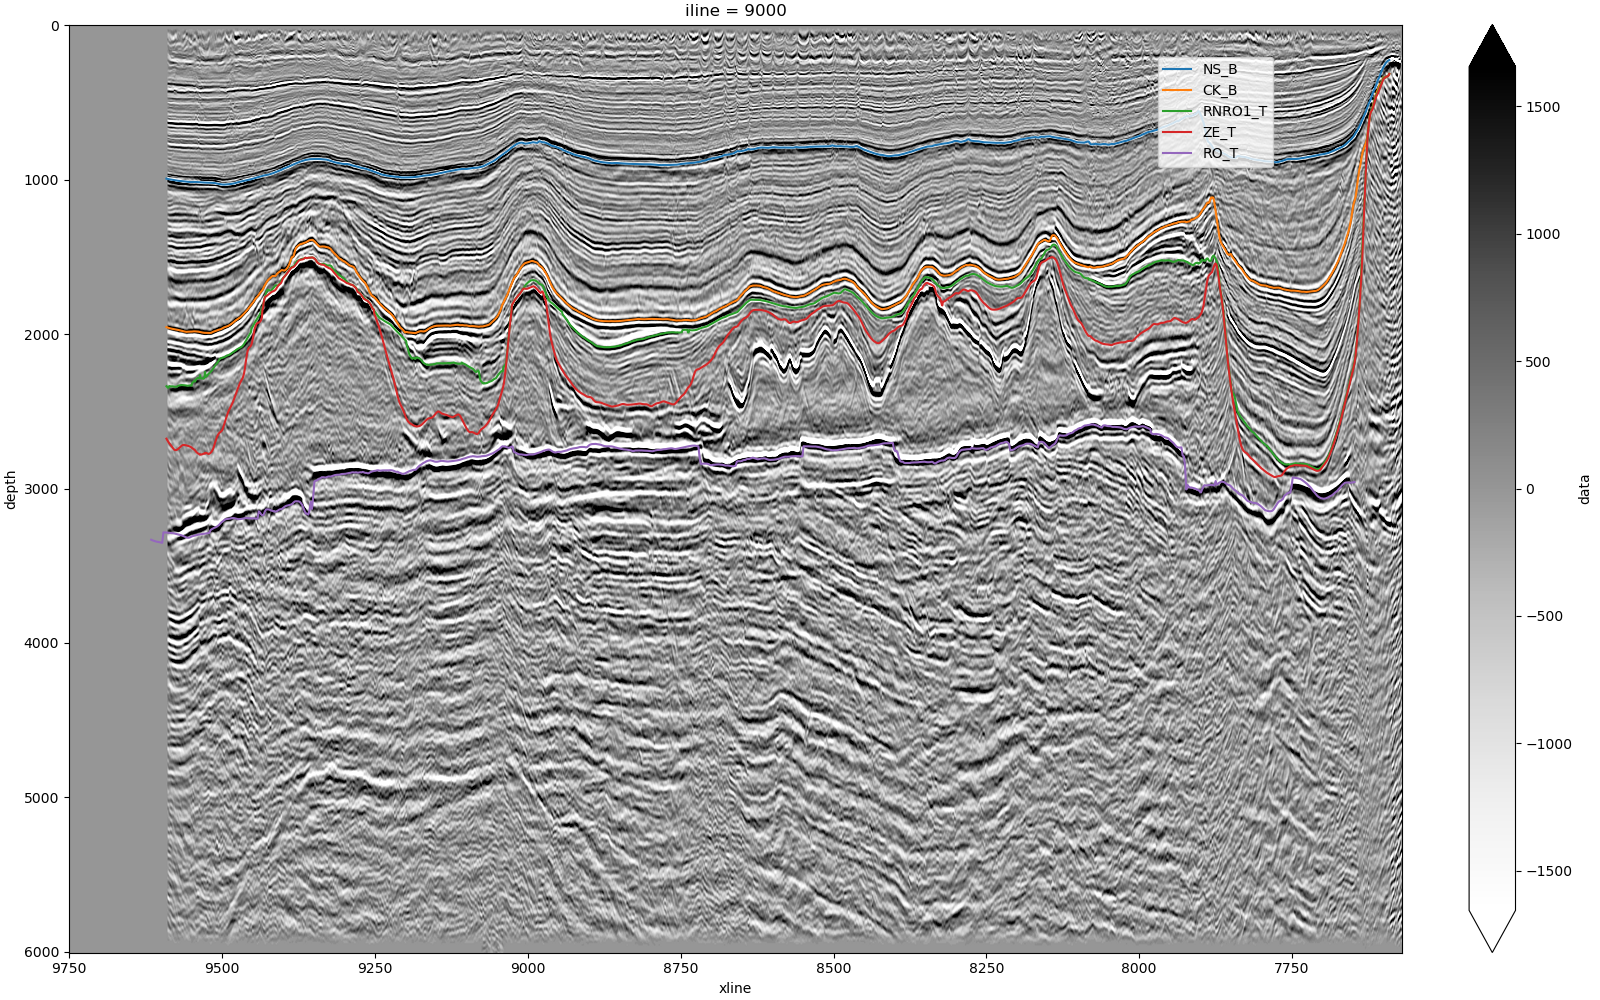

In [19]:
opt = dict(
    x="xline",
    y="depth",
    add_colorbar=True,
    interpolation="spline16",
    robust=True,
    yincrease=False,
    cmap="Greys",
)

f, ax = plt.subplots(figsize=(16, 10), constrained_layout=True)

seisnc.data.sel(iline=inl_sel, depth=slice(000, 6000)).plot.imshow(ax=ax, **opt)

artists = []
for horizon_name, horizon in horizon_trace.items():
    artist, = ax.plot(horizon["xline"], horizon["depth"], label=horizon_name)
    artists.append(artist)
ax.invert_xaxis()
f.legend(handles=artists, bbox_to_anchor=(0.8, 0.95), bbox_transform=f.transFigure)

# Basemap

In [20]:
from matplotlib.patches import Polygon

from src.visualization.visualize import plot_cartesian_gridded_surface

In [21]:
seisnc.seis.calc_corner_points()

In [22]:
# Inline, xline
seisnc.attrs["corner_points"]

((7740, 7570), (7740, 9750), (9700, 9750), (9700, 7570))

In [23]:
# CDP X, CDP Y
seisnc.attrs["corner_points_xy"]

((223512.5, 564262.44),
 (223512.5, 618762.44),
 (272512.5, 618762.44),
 (272512.5, 564262.44))

In [24]:
# Coordinates text label positions in basemap
text_aligment_kwargs = [
    {"horizontalalignment": "left", "verticalalignment": "bottom"},
    {"horizontalalignment": "left", "verticalalignment": "top"},
    {"horizontalalignment": "right", "verticalalignment": "top"},
    {"horizontalalignment": "right", "verticalalignment": "bottom"},
]

In [25]:
corners = np.array(seisnc.attrs["corner_points_xy"])

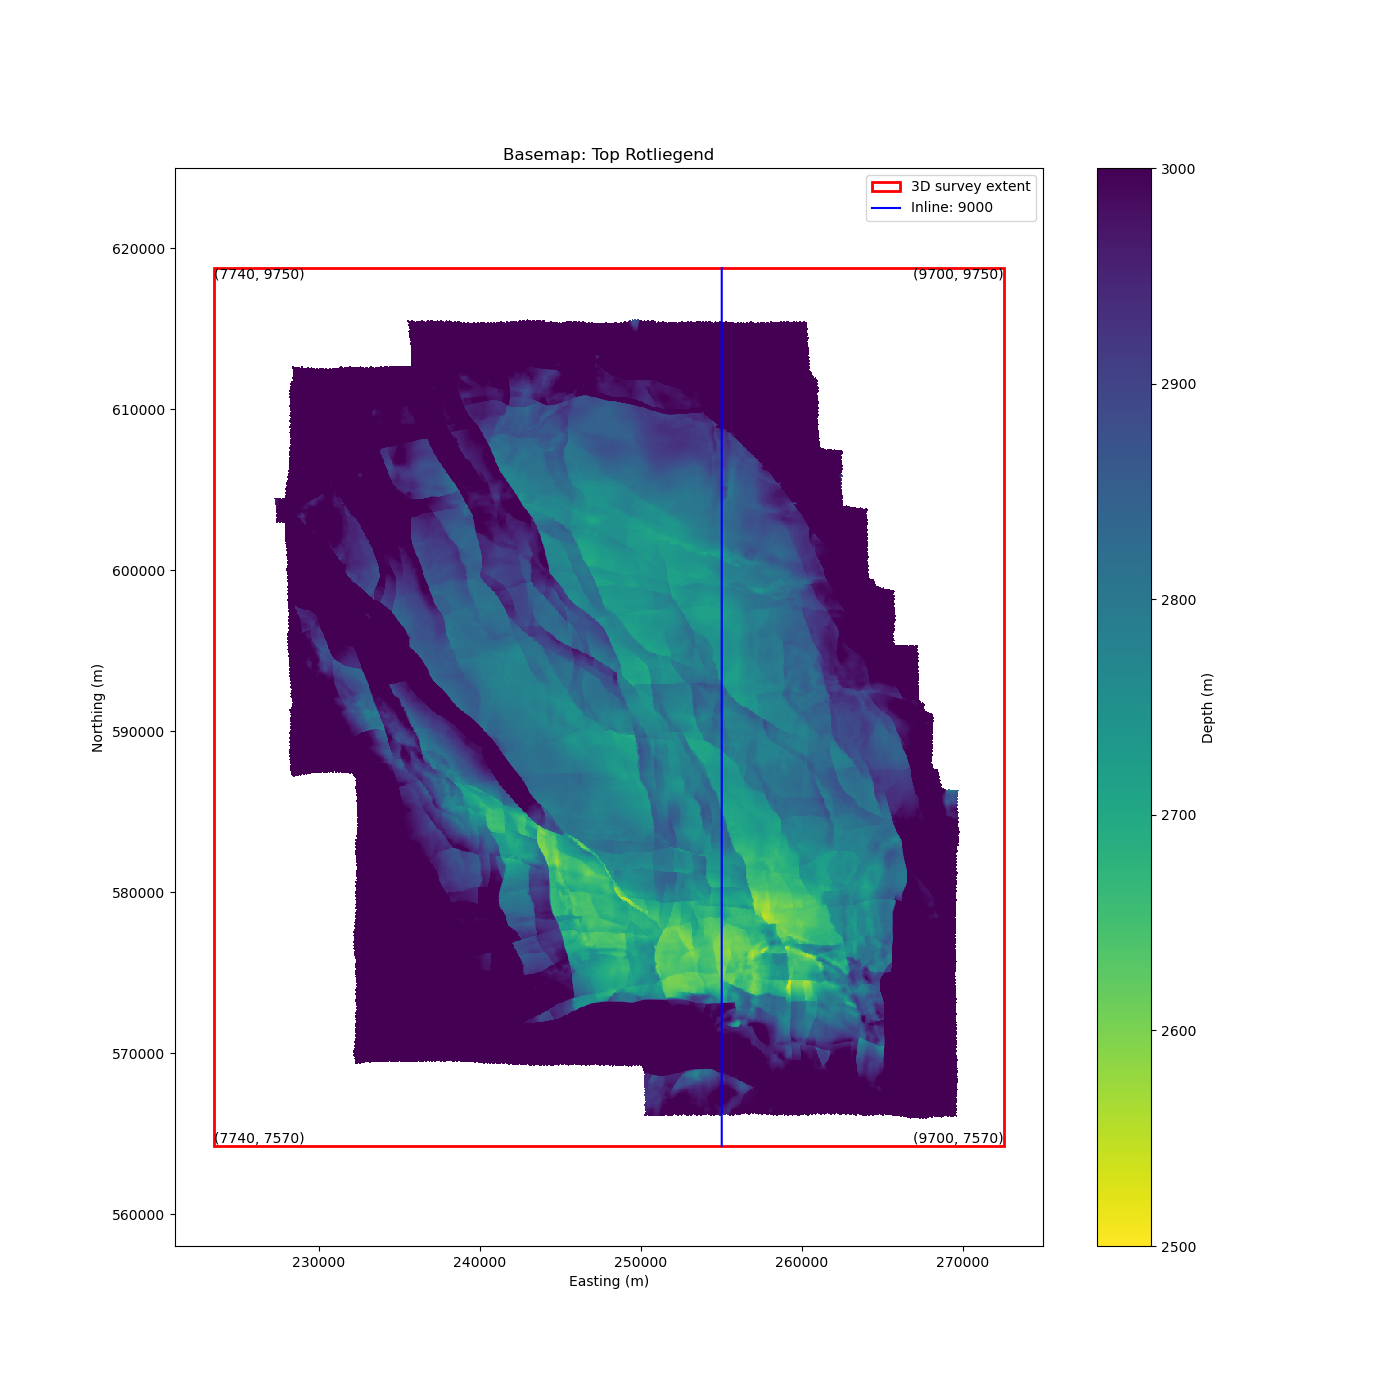

In [26]:
# Build seismic grid area (rectangle)
survey_limits = Polygon(corners, fill=False, edgecolor="r", linewidth=2, label="3D survey extent")

# Plot Top Rotliegend
title = "Basemap: Top Rotliegend"
fig, ax = plt.subplots(figsize=(14, 14))

im = plot_cartesian_gridded_surface(
    horizons['RO_T'],
    ax=ax,
    title=title,
    cmap="viridis_r",
    vmax=3000,
    vmin=2500,
)
fig.colorbar(im, ax=ax, label="Depth (m)")

# Plot seismic grid area
ax.add_patch(survey_limits)

# Plot selected inline
selected_inline = seisnc.data.sel(iline=inl_sel)
ax.plot(
    selected_inline.cdp_x,
    selected_inline.cdp_y,
    color="blue",
    label=f"Inline: {inl_sel}"
)
ax.axis("equal")
ax.legend()

# Add (inline, xline) labels to the seimic grid corners
for corner_point, corner_point_xy, kwargs in zip(
    seisnc.attrs["corner_points"],
    seisnc.attrs["corner_points_xy"],
    text_aligment_kwargs):
    x, y = corner_point_xy
    ax.text(x, y, str(corner_point), kwargs)
plt.show()
